In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the datasets
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')

tags = pd.read_csv('tags.csv')

In [17]:
#read rating file
ratings = pd.read_csv('ratings.csv')

In [20]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

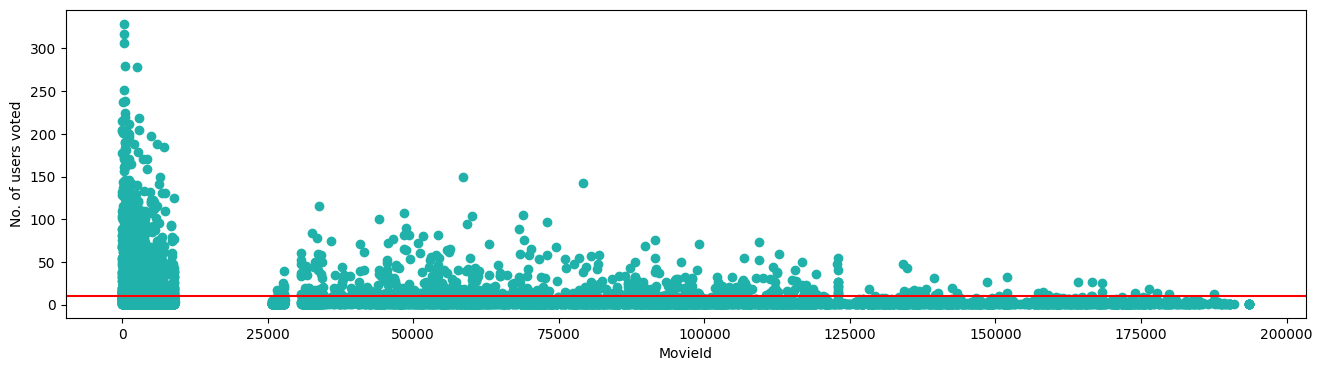

In [32]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='lightseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
# Merge movies dataset with tags dataset
movies_with_tags = pd.merge(movies, tags, on='movieId', how='left')

# Merge the result with links dataset
movies_combined = pd.merge(movies_with_tags, links, on='movieId', how='left')

# Data Cleaning and Preprocessing
# Drop unnecessary columns
movies_combined.drop(['imdbId', 'tmdbId'], axis=1, inplace=True)

# Fill missing values with appropriate values or drop them
# For instance, for 'tag' column, we may fill missing values with an empty string
movies_combined['tag'].fillna('', inplace=True)

# You might need to handle missing values in other columns as well based on your analysis requirements

# Now, the dataset is preprocessed and ready for further analysis


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the final dataset
normalized_final_dataset = scaler.fit_transform(final_dataset)

# Convert the normalized dataset back to a DataFrame
normalized_final_df = pd.DataFrame(normalized_final_dataset, index=final_dataset.index, columns=final_dataset.columns)

# Display the normalized dataset
normalized_final_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.75,NaN,NaN,NaN,0.75,NaN,0.888889,NaN,NaN,NaN,...,0.333333,NaN,0.75,0.5,0.750,0.444444,0.75,0.444444,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,0.75,NaN,0.75,NaN,NaN,...,NaN,0.75,NaN,1.0,0.625,NaN,NaN,0.333333,NaN,NaN
3,0.75,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Fill missing values with zero
final_dataset_filled = final_dataset.fillna(0)

# Normalize the final dataset
normalized_final_dataset = scaler.fit_transform(final_dataset_filled)

# Convert the normalized dataset back to a DataFrame
normalized_final_df = pd.DataFrame(normalized_final_dataset, index=final_dataset_filled.index, columns=final_dataset_filled.columns)

# Display the normalized dataset
normalized_final_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.8,0.0,0.0,0.0,0.8,0.0,0.9,0.0,0.0,0.0,...,0.8,0.0,0.8,0.6,0.8,0.5,0.8,0.5,0.75,1.0
2,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.8,0.0,0.0,...,0.0,0.8,0.0,1.0,0.7,0.0,0.0,0.4,0.00,0.0
3,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.00,0.0
